### 0. 데이터 전처리 및 정리

In [64]:
import matplotlib.pyplot as plt
from matplotlib import rc

from matplotlib import font_manager
f_path = "C:/windows/Fonts/malgun.ttf"
font_manager.FontProperties(fname=f_path).get_name()
rc('font', family='Malgun Gothic')

'Malgun Gothic'

In [65]:
import numpy as np
import pandas as pd

In [66]:
win_team = pd.read_csv('C:\\data\\ranked_win_team_game_edit.csv')
lose_team = pd.read_csv('C:\\data\\ranked_lose_team_game_edit.csv')

win_player = pd.read_csv('C:\\data\\win_player_ranked_sum.csv')
lose_player = pd.read_csv('C:\\data\\lose_player_ranked_sum.csv')

# 게임아이디, 게임소요시간을 키로 inner join 팀데이터, 플레이어 데이터
merged_df1 = pd.merge(win_team, win_player, on=['gameId','gameDuration'], how='inner')
merded_df2 = pd.merge(lose_team, lose_player, on = ['gameId','gameDuration'], how='inner')

# 승리팀, 패배팀 데이터 결합
df = pd.concat([merged_df1,merded_df2], ignore_index=True)

# 필요없는 컬럼 제거
df = df.drop(['queueId', 'P1_teamId','gameVersion'], axis = 'columns')

# True, False 로 되어있는 데이터, bool 타입으로 일괄 변경
n = df.shape[1]
for i in range(n):
    if str(df.iloc[0,i]) =='True' or str(df.iloc[0,i]) == 'False':
        df[df.columns[i]] = df[df.columns[i]].astype(bool)

# 범주형 데이터를 이진형 데이터로 변환
df = df.replace({True:1, False:0})
df = df.replace({'Win':1, 'Fail':0})
df = df.replace({'100':1, '200':0})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154172 entries, 0 to 154171
Data columns (total 40 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   gameId                                      154172 non-null  float64
 1   gameDuration                                154172 non-null  float64
 2   teamId                                      154172 non-null  int64  
 3   win                                         154172 non-null  int64  
 4   firstBlood                                  154172 non-null  int64  
 5   firstTower                                  154172 non-null  int64  
 6   firstInhibitor                              154172 non-null  int64  
 7   firstBaron                                  154172 non-null  int64  
 8   firstDragon                                 154172 non-null  int64  
 9   firstRiftHerald                             154172 non-null  int64  
 

In [67]:
df.head()

,gameId,gameDuration,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,...,P_stats_physicalDamageTaken_sum,P_stats_trueDamageTaken_sum,P_stats_totalDamageTaken_sum,P_stats_totalHeal_sum,P_stats_damageSelfMitigated_sum,P_stats_timeCCingOthers_sum,P_stats_wardsPlaced_sum,P_stats_wardsKilled_sum,P_stats_goldEarned_sum,P_stats_goldSpent_sum
0,4247263043.00000,1323.00000,200,1,0,1,1,0,1,1,...,53345.00000,2481.00000,83723.00000,38711.00000,43665.00000,93.00000,50.00000,17.00000,49832.00000,41935.00000
1,4247155821.00000,1317.00000,100,1,0,0,0,0,1,1,...,49033.00000,1358.00000,63456.00000,26397.00000,42434.00000,74.00000,57.00000,18.00000,41072.00000,34960.00000
2,4243963257.00000,932.00000,200,1,1,1,1,0,1,1,...,27051.00000,638.00000,40416.00000,12589.00000,28055.00000,67.00000,40.00000,9.00000,35364.00000,30755.00000
3,4241678498.00000,2098.00000,200,1,1,1,0,0,0,1,...,80742.00000,10851.00000,144672.00000,65312.00000,129493.00000,163.00000,96.00000,56.00000,70528.00000,63893.00000
4,4241538868.00000,2344.00000,100,1,1,1,1,1,1,1,...,64462.00000,14975.00000,162481.00000,37161.00000,117374.00000,119.00000,114.00000,35.00000,74955.00000,71580.00000


In [68]:
#데이터 null 확인
df.isnull().sum().sum()

0

In [69]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['gameId', 'gameDuration', 'teamId', 'win', 'firstBlood', 'firstTower',
       'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald',
       'towerKills', 'inhibitorKills', 'baronKills', 'dragonKills',
       'vilemawKills', 'riftHeraldKills', 'dominionVictoryScore',
       'ban_champion_1', 'ban_champion_2', 'ban_champion_3', 'ban_champion_4',
       'ban_champion_5', 'P_stats_kills_sum', 'P_stats_deaths_sum',
       'P_stats_assists_sum', 'P_stats_magicDamageDealtToChampions_sum',
       'P_stats_physicalDamageDealtToChampions_sum',
       'P_stats_trueDamageDealtToChampions_sum',
       'P_stats_totalDamageDealtToChampions_sum',
       'P_stats_magicalDamageTaken_sum', 'P_stats_physicalDamageTaken_sum',
       'P_stats_trueDamageTaken_sum', 'P_stats_totalDamageTaken_sum',
       'P_stats_totalHeal_sum', 'P_stats_damageSelfMitigated_sum',
       'P_stats_timeCCingOthers_sum', 'P_stats_wardsPlaced_sum',
       'P_stats_wardsKilled

### 1. 승리팀 평균치, 패배팀 평균치 비교

In [70]:
df.describe()[['towerKills','inhibitorKills','baronKills','dragonKills']]

,towerKills,inhibitorKills,baronKills,dragonKills
count,154172.00000,154172.00000,154172.00000,154172.00000
mean,4.49355,0.59934,0.35552,1.59901
std,3.43048,0.86979,0.57055,1.25160
min,0.00000,0.00000,0.00000,0.00000
25%,1.00000,0.00000,0.00000,1.00000
50%,4.00000,0.00000,0.00000,2.00000
75%,7.00000,1.00000,1.00000,2.00000
max,11.00000,10.00000,5.00000,7.00000


In [71]:
# 패배팀 데이터 통계
df[df['win'] == 0].describe()[['towerKills','inhibitorKills','baronKills','dragonKills']]

,towerKills,inhibitorKills,baronKills,dragonKills
count,77086.00000,77086.00000,77086.00000,77086.00000
mean,1.87915,0.07934,0.12356,0.93704
std,1.96351,0.36827,0.37490,1.02587
min,0.00000,0.00000,0.00000,0.00000
25%,0.00000,0.00000,0.00000,0.00000
50%,1.00000,0.00000,0.00000,1.00000
75%,3.00000,0.00000,0.00000,2.00000
max,11.00000,6.00000,4.00000,6.00000


In [72]:
# 승리팀 데이터 통계
df[df['win'] == 1].describe()[['towerKills','inhibitorKills','baronKills','dragonKills']]

,towerKills,inhibitorKills,baronKills,dragonKills
count,77086.00000,77086.00000,77086.00000,77086.00000
mean,7.10794,1.11935,0.58749,2.26097
std,2.45169,0.91468,0.63474,1.09736
min,0.00000,0.00000,0.00000,0.00000
25%,5.00000,1.00000,0.00000,1.00000
50%,7.00000,1.00000,1.00000,2.00000
75%,9.00000,2.00000,1.00000,3.00000
max,11.00000,10.00000,5.00000,7.00000


In [73]:
df[df['towerKills'] == 0].describe()[['inhibitorKills','baronKills','dragonKills']]

,inhibitorKills,baronKills,dragonKills
count,24715.00000,24715.00000,24715.00000
mean,0.00000,0.01088,0.38264
std,0.00000,0.10531,0.61674
min,0.00000,0.00000,0.00000
25%,0.00000,0.00000,0.00000
50%,0.00000,0.00000,0.00000
75%,0.00000,0.00000,1.00000
max,0.00000,2.00000,4.00000


In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

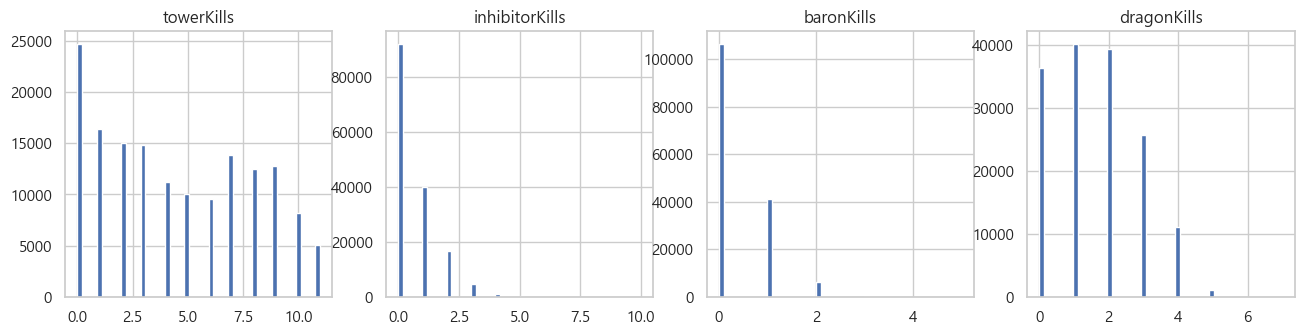

In [75]:
df_hist = df[['towerKills','inhibitorKills','baronKills','dragonKills']]

def plot_hist_each_column(df_hist):
    plt.rcParams['figure.figsize'] = [20,20]
    fig = plt.figure()
    for i in range(len(df_hist.columns)):
        ax = fig.add_subplot(5, 5, i+1)
        plt.hist(df_hist[df_hist.columns[i]], bins=50)
        ax.set_title(df_hist.columns[i])
    plt.show()

plot_hist_each_column(df_hist)

### 2. 승리팀 중요 변수 확인

In [76]:
# 숫자형 데이터 제거, 퍼스트 데이터만 요인 분석
df_first = df.drop(["towerKills","inhibitorKills","baronKills",
         "dragonKills","vilemawKills","riftHeraldKills",
         "dominionVictoryScore","gameId","teamId", "ban_champion_1", "ban_champion_2", 
         "ban_champion_3", "ban_champion_4", "ban_champion_5"], axis=1)

df_first.head()

,gameDuration,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,P_stats_kills_sum,P_stats_deaths_sum,...,P_stats_physicalDamageTaken_sum,P_stats_trueDamageTaken_sum,P_stats_totalDamageTaken_sum,P_stats_totalHeal_sum,P_stats_damageSelfMitigated_sum,P_stats_timeCCingOthers_sum,P_stats_wardsPlaced_sum,P_stats_wardsKilled_sum,P_stats_goldEarned_sum,P_stats_goldSpent_sum
0,1323.00000,1,0,1,1,0,1,1,31.00000,15.00000,...,53345.00000,2481.00000,83723.00000,38711.00000,43665.00000,93.00000,50.00000,17.00000,49832.00000,41935.00000
1,1317.00000,1,0,0,0,0,1,1,19.00000,8.00000,...,49033.00000,1358.00000,63456.00000,26397.00000,42434.00000,74.00000,57.00000,18.00000,41072.00000,34960.00000
2,932.00000,1,1,1,1,0,1,1,20.00000,5.00000,...,27051.00000,638.00000,40416.00000,12589.00000,28055.00000,67.00000,40.00000,9.00000,35364.00000,30755.00000
3,2098.00000,1,1,1,0,0,0,1,36.00000,26.00000,...,80742.00000,10851.00000,144672.00000,65312.00000,129493.00000,163.00000,96.00000,56.00000,70528.00000,63893.00000
4,2344.00000,1,1,1,1,1,1,1,27.00000,40.00000,...,64462.00000,14975.00000,162481.00000,37161.00000,117374.00000,119.00000,114.00000,35.00000,74955.00000,71580.00000


<Figure size 1000x1000 with 0 Axes>

<AxesSubplot: >

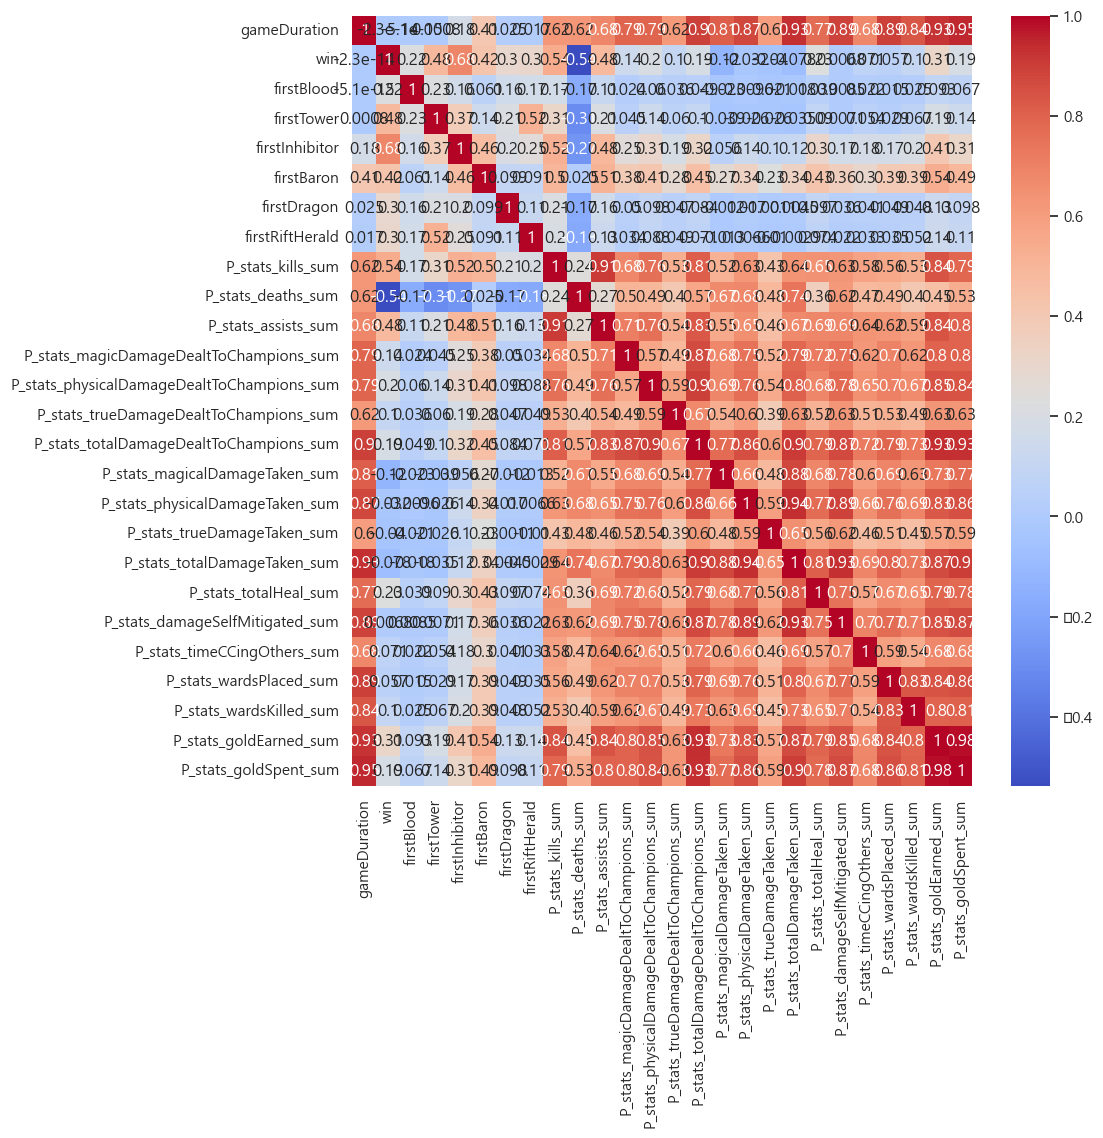

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

#항목별 상관도 확인
plt.figure(figsize=(10,10))
sns.heatmap(df_first.corr(),cmap='coolwarm',annot=True)
plt.show()

In [78]:
df_first["firstBlood"] = df["firstBlood"].astype(int)
df_first["firstTower"] = df["firstTower"].astype(int)
df_first["firstInhibitor"] = df["firstInhibitor"].astype(int)
df_first["firstDragon"] = df["firstDragon"].astype(int)
df_first["firstBaron"] = df["firstBaron"].astype(int)
df_first["firstRiftHerald"] = df["firstRiftHerald"].astype(int)

In [79]:
df_first.groupby('win').mean()

,gameDuration,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,P_stats_kills_sum,P_stats_deaths_sum,P_stats_assists_sum,...,P_stats_physicalDamageTaken_sum,P_stats_trueDamageTaken_sum,P_stats_totalDamageTaken_sum,P_stats_totalHeal_sum,P_stats_damageSelfMitigated_sum,P_stats_timeCCingOthers_sum,P_stats_wardsPlaced_sum,P_stats_wardsKilled_sum,P_stats_goldEarned_sum,P_stats_goldSpent_sum
win,,,,,,,,,,,,,,,,,,,,,
0,1480.82512,0.39001,0.25905,0.04569,0.09121,0.34468,0.33260,16.31239,27.82130,24.82496,...,54060.03071,4359.92776,89021.52785,21056.93567,63400.02042,84.01782,58.96281,21.15895,41984.05974,40070.40038
1,1480.82512,0.60999,0.74035,0.70760,0.47243,0.64174,0.63091,27.76524,16.39686,44.14828,...,52653.59039,4087.72445,83199.43411,27727.96503,63912.88968,90.22397,61.94082,23.93215,51057.67106,45485.18600


DecisionTreeClassifier(min_samples_split=40000, random_state=0)

<Figure size 5000x1000 with 0 Axes>

[Text(0.6153846153846154, 0.95, 'firstInhibitor <= 0.5\ngini = 0.5\nsamples = 154172\nvalue = [77086, 77086]\nclass = fail'),
 Text(0.38461538461538464, 0.85, 'P_stats_deaths_sum <= 14.5\ngini = 0.359\nsamples = 96104\nvalue = [73564, 22540]\nclass = fail'),
 Text(0.3076923076923077, 0.75, 'gini = 0.368\nsamples = 19197\nvalue = [4671, 14526]\nclass = win'),
 Text(0.46153846153846156, 0.75, 'P_stats_kills_sum <= 25.5\ngini = 0.187\nsamples = 76907\nvalue = [68893, 8014]\nclass = fail'),
 Text(0.38461538461538464, 0.65, 'firstBaron <= 0.5\ngini = 0.055\nsamples = 60700\nvalue = [58975, 1725]\nclass = fail'),
 Text(0.3076923076923077, 0.55, 'P_stats_deaths_sum <= 17.5\ngini = 0.031\nsamples = 57058\nvalue = [56168, 890]\nclass = fail'),
 Text(0.23076923076923078, 0.45, 'gini = 0.186\nsamples = 5156\nvalue = [4621, 535]\nclass = fail'),
 Text(0.38461538461538464, 0.45, 'P_stats_goldEarned_sum <= 68563.5\ngini = 0.014\nsamples = 51902\nvalue = [51547, 355]\nclass = fail'),
 Text(0.30769230

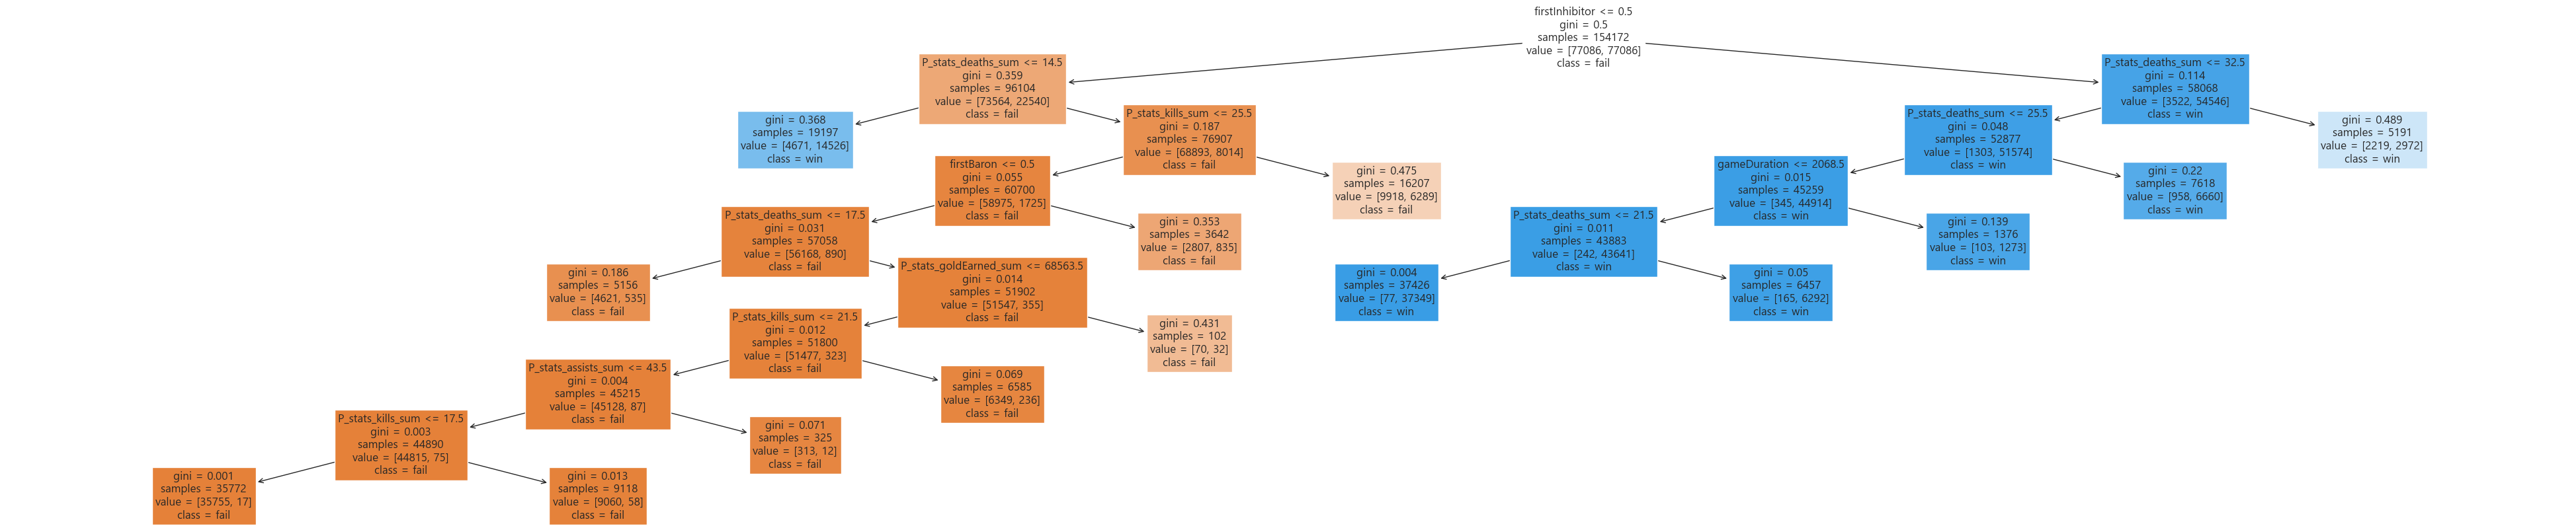

In [80]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
X = df_first.drop(['win'], axis=1)
y = df_first['win']
xname = X.columns
yname = ['fail','win']

c_tree = DecisionTreeClassifier(min_samples_split=40000,random_state=0) 
c_tree.fit(X, y)
plt.figure(figsize=(50,10))
plot_tree(c_tree, feature_names=xname, class_names=yname, filled=True, fontsize=12) 
plt.show()


### 3. 경기 시간 segment 별 EDA

### 4. 앙상블 분석 : 승리 예측 정확도 비교

     4.1 랜덤포레스트

In [81]:
from sklearn.model_selection import train_test_split

X = df[['firstBlood', 'firstTower',
       'firstBaron', 'firstDragon', 'firstInhibitor', 'dragonKills',
       'baronKills', 'towerKills', 'inhibitorKills']]
y = df['win']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, stratify=y, 
                                                    random_state=123456)

In [82]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

#oob_score = out of bag score로써 예측이 얼마나 정확한가에 대한 추정치입니다.
print(f'랜덤포레스트 테스트 정확도=  : {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')


RandomForestClassifier(oob_score=True, random_state=123456)

랜덤포레스트 테스트 정확도=  : 0.884
Mean accuracy score: 0.883


    4.2 GradientBoosting

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
clf_gbc = GradientBoostingClassifier()
clf_gbc.fit(X_train,y_train)

y_pred = clf_gbc.predict(X_test)

print('GradientBoosting 테스트 정확도 = ' + str(accuracy_score(y_test,y_pred)))

GradientBoostingClassifier()

GradientBoosting 테스트 정확도 = 0.8830656669174688


    4.3 Xgboost

In [84]:
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot

In [85]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)
y_pred = xgb_model.predict(X_test)

print('Xgboost 테스트 정확도 = ' + str(accuracy_score(y_test,y_pred)))#정확도 계산

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Xgboost 테스트 정확도 = 0.885997457385258


    4.4 변수 중요도 체크

In [86]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<Figure size 1000x500 with 0 Axes>

 1)firstBlood                    0.386597
 2)firstTower                    0.198951
 3)firstBaron                    0.160988
 4)firstDragon                   0.092747
 5)firstInhibitor                0.082058
 6)dragonKills                   0.029657
 7)baronKills                    0.019687
 8)towerKills                    0.018123
 9)inhibitorKills                0.011190


Text(0.5, 1.0, '랜덤포레스트 Feature Importances')

<BarContainer object of 9 artists>

([<matplotlib.axis.XTick at 0x24301206df0>,
 [Text(0, 0, 'firstBlood'),
  Text(1, 0, 'firstTower'),
  Text(2, 0, 'firstBaron'),
  Text(3, 0, 'firstDragon'),
  Text(4, 0, 'firstInhibitor'),
  Text(5, 0, 'dragonKills'),
  Text(6, 0, 'baronKills'),
  Text(7, 0, 'towerKills'),
  Text(8, 0, 'inhibitorKills')])

(-1.0, 9.0)

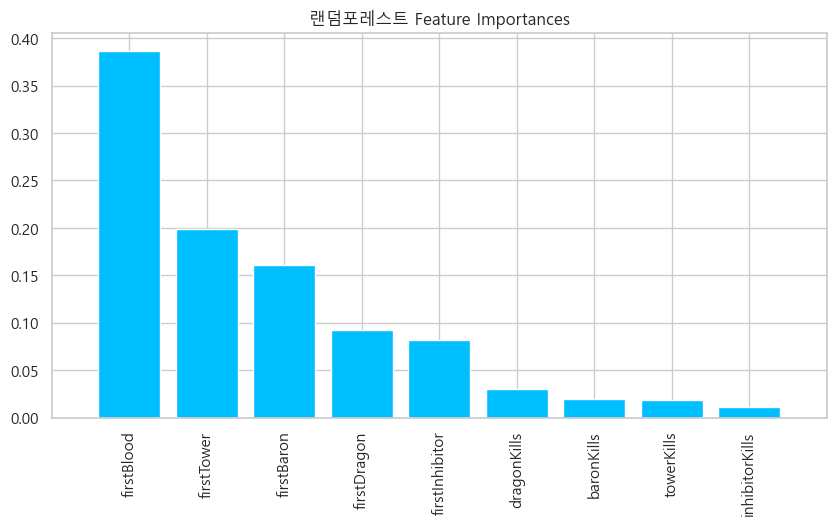

In [87]:
# 랜덤포레스트 변수 중요도
plt.figure(figsize=(10,5))

features_label = X.columns
rf_importances = rf.feature_importances_
indices = np.argsort(rf_importances)[::-1]
for i in range(X.shape[1]):
     print('%2d)%-*s%f'%(i+1, 30, features_label[i], rf_importances[indices[i]]))
plt.title('랜덤포레스트 Feature Importances')
plt.bar(range(X.shape[1]), rf_importances[indices], color='deepskyblue', align='center')
plt.xticks(range(X.shape[1]), features_label, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

<Figure size 1000x500 with 0 Axes>

Text(0.5, 1.0, 'Gradient Boosting Feature importances')

<AxesSubplot: title={'center': 'Gradient Boosting Feature importances'}>

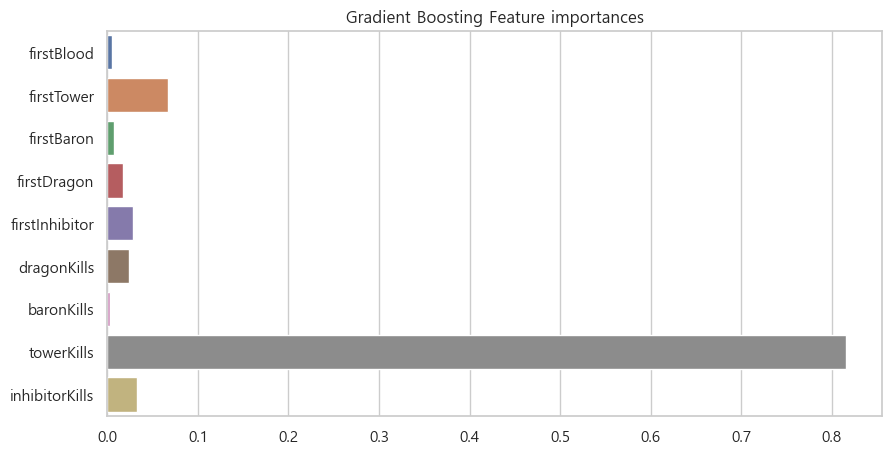

In [88]:
# Gradient Boosting 변수 중요도
plt.figure(figsize=(10,5))

gb_importances = clf_gbc.feature_importances_
gb_importances = pd.Series(gb_importances, index = X_train.columns)

plt.title('Gradient Boosting Feature importances')
sns.barplot(x=gb_importances, y=X_train.columns)
plt.show()

<AxesSubplot: title={'center': 'xgboost Feature importances'}, xlabel='F score', ylabel='Features'>

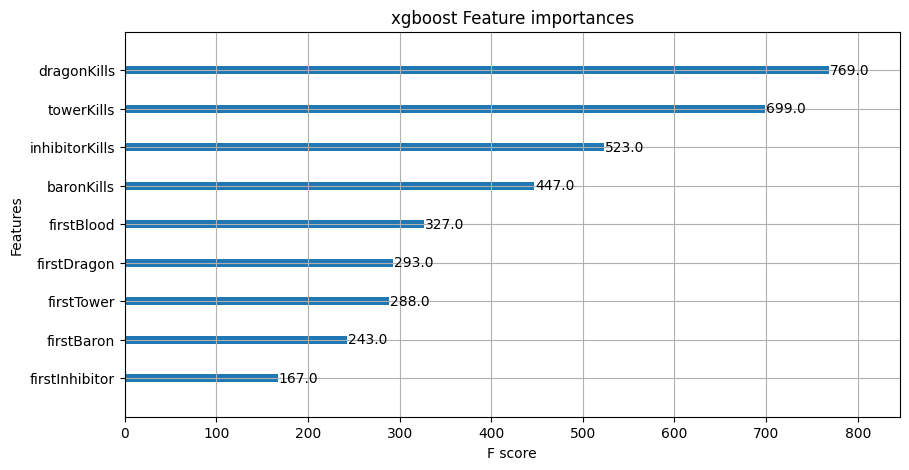

In [29]:
# xgboost 변수 중요도

fig, ax = plt.subplots(figsize=(10, 5))
plot_importance(xgb_model, title='xgboost Feature importances', ax=ax)

### 5. 로지스틱 회귀분석

In [30]:
df = df.drop(['gameId', 'gameDuration', 'vilemawKills', 'dominionVictoryScore','ban_champion_1', 'ban_champion_2', 'ban_champion_3', 'ban_champion_4', 'ban_champion_5'], axis=1)
df.corr()[['win']]

,win
teamId,0.006460
win,1.000000
firstBlood,0.219988
firstTower,0.481307
firstInhibitor,0.683023
firstBaron,0.423688
firstDragon,0.297085
firstRiftHerald,0.298502
towerKills,0.762111
inhibitorKills,0.597852


In [31]:
df

,teamId,win,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,...,P_stats_physicalDamageTaken_sum,P_stats_trueDamageTaken_sum,P_stats_totalDamageTaken_sum,P_stats_totalHeal_sum,P_stats_damageSelfMitigated_sum,P_stats_timeCCingOthers_sum,P_stats_wardsPlaced_sum,P_stats_wardsKilled_sum,P_stats_goldEarned_sum,P_stats_goldSpent_sum
0,200,1,0,1,1,0,1,1,9,1,...,53345.0,2481.0,83723.0,38711.0,43665.0,93.0,50.0,17.0,49832.0,41935.0
1,100,1,0,0,0,0,1,1,4,0,...,49033.0,1358.0,63456.0,26397.0,42434.0,74.0,57.0,18.0,41072.0,34960.0
2,200,1,1,1,1,0,1,1,5,1,...,27051.0,638.0,40416.0,12589.0,28055.0,67.0,40.0,9.0,35364.0,30755.0
3,200,1,1,1,0,0,0,1,6,0,...,80742.0,10851.0,144672.0,65312.0,129493.0,163.0,96.0,56.0,70528.0,63893.0
4,100,1,1,1,1,1,1,1,11,3,...,64462.0,14975.0,162481.0,37161.0,117374.0,119.0,114.0,35.0,74955.0,71580.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154167,100,0,0,0,0,0,0,0,0,0,...,33286.0,836.0,40408.0,6961.0,23271.0,31.0,31.0,8.0,23269.0,23104.0
154168,200,0,0,1,0,0,1,0,1,0,...,57260.0,2976.0,96933.0,31291.0,58919.0,92.0,47.0,19.0,36579.0,35740.0
154169,200,0,0,0,0,0,0,0,0,0,...,18397.0,1005.0,36488.0,5316.0,18004.0,42.0,24.0,3.0,20917.0,18120.0
154170,200,0,0,1,0,0,1,1,3,0,...,52157.0,1668.0,80161.0,22970.0,58307.0,57.0,64.0,22.0,42639.0,40008.0


In [32]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

X = df[df.columns.difference(['win'])]
y = df['win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=19)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    win   R-squared (uncentered):                   0.915
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                          4.166e+04
Date:                Fri, 24 Feb 2023   Prob (F-statistic):                        0.00
Time:                        13:52:09   Log-Likelihood:                          18841.
No. Observations:              115629   AIC:                                 -3.762e+04
Df Residuals:                  115599   BIC:                                 -3.733e+04
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
P_stats_assists_sum                            0.0018   8.39e-05     20.969      0.000       0.002       0.002
P_stats_damageSelfMitigated_sum            -7.143e-07   5.02e-08    -14.233      0.000   -8.13e-07   -6.16e-07
P_stats_deaths_sum                            -0.0149      0.000   -102.987      0.000      -0.015      -0.015
P_stats_goldEarned_sum                      4.152e-05   3.09e-07    134.329      0.000    4.09e-05    4.21e-05
P_stats_goldSpent_sum                      -2.895e-05   2.84e-07   -101.817      0.000   -2.95e-05   -2.84e-05
P_stats_kills_sum                              0.0132      0.000     73.598      0.000       0.013       0.014
P_stats_magicDamageDealtToChampions_sum       -0.0062      0.000    -13.816      0.000      -0.007      -0.005
P_stats_magicalDamageTaken_sum                -0.0093      0.000    -23.113      0.000      -0.010      -0.009
P_stats_physicalDamageDealtToChampions_sum    -0.0062      0.000    -13.817      0.000      -0.007      -0.005
P_stats_physicalDamageTaken_sum               -0.0093      0.000    -23.110      0.000      -0.010      -0.009
P_stats_timeCCingOthers_sum                -1.403e-05   2.08e-05     -0.673      0.501   -5.49e-05    2.68e-05
P_stats_totalDamageDealtToChampions_sum        0.0062      0.000     13.815      0.000       0.005       0.007
P_stats_totalDamageTaken_sum                   0.0093      0.000     23.100      0.000       0.009       0.010
P_stats_totalHeal_sum                       3.333e-06   9.59e-08     34.756      0.000    3.14e-06    3.52e-06
P_stats_trueDamageDealtToChampions_sum        -0.0062      0.000    -13.817      0.000      -0.007      -0.005
P_stats_trueDamageTaken_sum                   -0.0093      0.000    -23.118      0.000      -0.010      -0.009
P_stats_wardsKilled_sum                       -0.0027   8.83e-05    -30.397      0.000      -0.003      -0.003
P_stats_wardsPlaced_sum                       -0.0011   5.48e-05    -19.374      0.000      -0.001      -0.001
baronKills                                     0.0764      0.003     29.882      0.000       0.071       0.081
dragonKills                                    0.0188      0.001     22.039      0.000       0.017       0.020
firstBaron                                    -0.0467      0.003    -15.766      0.000      -0.053      -0.041
firstBlood                                    -0.0048      0.001     -3.756      0.000      -0.007      -0.002
firstDragon                                    0.0099      0.002      6.382      0.000       0.007       0.013
firstInhibitor                                 0.0661      0.003     26.117      0.000       0.061

Text(0.5, 1.0, 'feature_coef_graph')

Text(0.5, 0, 'X_features')

Text(0, 0.5, 'coef')

[Text(0, 0, 'P_stats_assists_sum'),
 Text(1, 0, 'P_stats_damageSelfMitigated_sum'),
 Text(2, 0, 'P_stats_deaths_sum'),
 Text(3, 0, 'P_stats_goldEarned_sum'),
 Text(4, 0, 'P_stats_goldSpent_sum'),
 Text(5, 0, 'P_stats_kills_sum'),
 Text(6, 0, 'P_stats_magicDamageDealtToChampions_sum'),
 Text(7, 0, 'P_stats_magicalDamageTaken_sum'),
 Text(8, 0, 'P_stats_physicalDamageDealtToChampions_sum'),
 Text(9, 0, 'P_stats_physicalDamageTaken_sum'),
 Text(10, 0, 'P_stats_timeCCingOthers_sum'),
 Text(11, 0, 'P_stats_totalDamageDealtToChampions_sum'),
 Text(12, 0, 'P_stats_totalDamageTaken_sum'),
 Text(13, 0, 'P_stats_totalHeal_sum'),
 Text(14, 0, 'P_stats_trueDamageDealtToChampions_sum'),
 Text(15, 0, 'P_stats_trueDamageTaken_sum'),
 Text(16, 0, 'P_stats_wardsKilled_sum'),
 Text(17, 0, 'P_stats_wardsPlaced_sum'),
 Text(18, 0, 'baronKills'),
 Text(19, 0, 'dragonKills'),
 Text(20, 0, 'firstBaron'),
 Text(21, 0, 'firstBlood'),
 Text(22, 0, 'firstDragon'),
 Text(23, 0, 'firstInhibitor'),
 Text(24, 0, 'fi

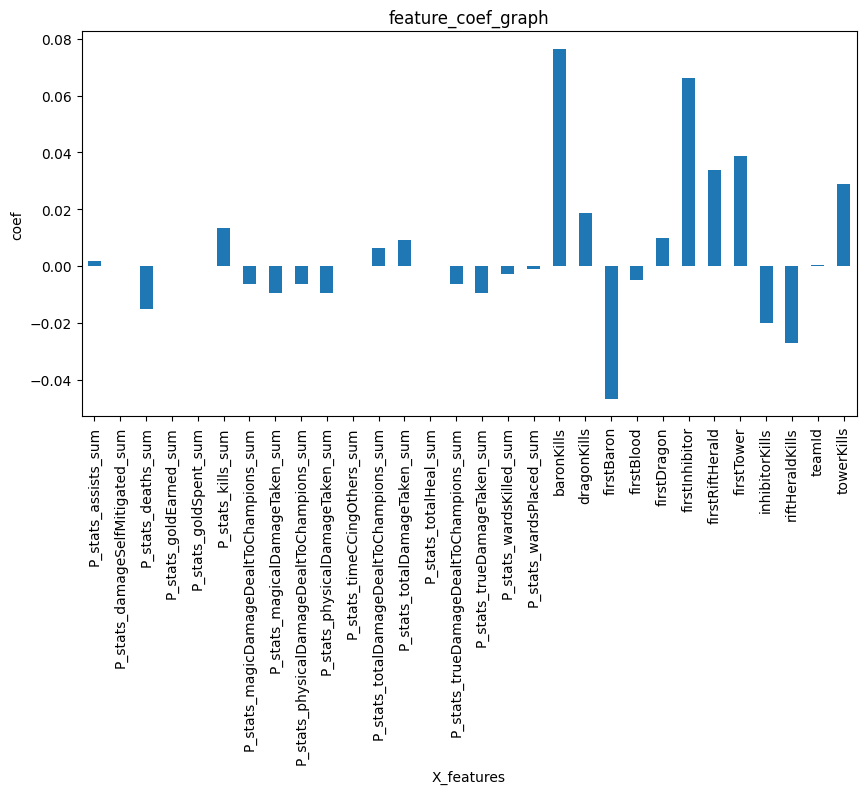

In [33]:
import matplotlib.pyplot as plt

coefs = model.params.tolist()
coefs_series = pd.Series(coefs)

plt.rcParams['figure.figsize'] = [10,5]

x_labels = model.params.index.tolist()

ax = coefs_series.plot(kind='bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('X_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

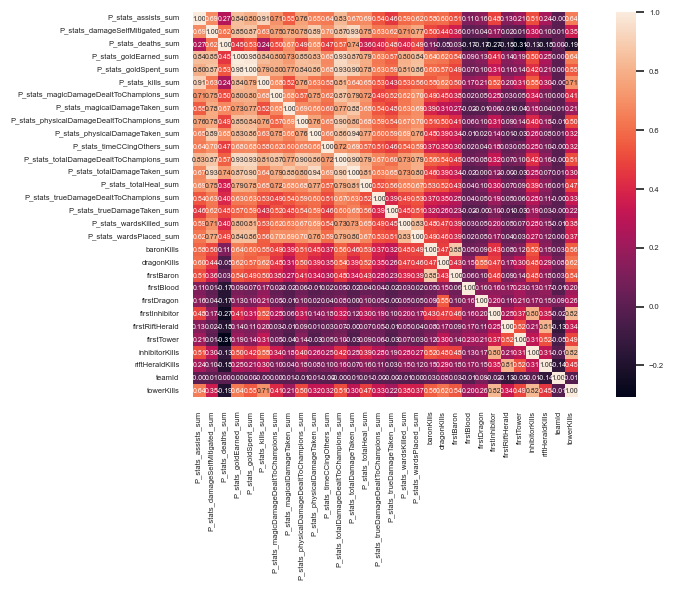

In [34]:
import seaborn as sns

corr = df[X.columns].corr(method='pearson')
sns.set(font_scale=0.5)
hm = sns.heatmap(corr.values, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws ={'size' : 5}, 
                 yticklabels = X.columns, xticklabels = X.columns )

sns.set(style = 'whitegrid', context = 'notebook')
plt.show()

In [40]:
pd.options.display.float_format = '{:.5f}'.format

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.round()


,VIF Factor,features
0,31.00000,P_stats_assists_sum
1,38.00000,P_stats_damageSelfMitigated_sum
2,35.00000,P_stats_deaths_sum
3,620.00000,P_stats_goldEarned_sum
4,451.00000,P_stats_goldSpent_sum
5,53.00000,P_stats_kills_sum
6,530670682.00000,P_stats_magicDamageDealtToChampions_sum
7,485929439.00000,P_stats_magicalDamageTaken_sum
8,788186034.00000,P_stats_physicalDamageDealtToChampions_sum
9,1483365618.00000,P_stats_physicalDamageTaken_sum


In [50]:
# vif factor가 높은 변수를 제거하고 회귀분석 수행

X2 = df[df.columns.difference(['win', 'P_stats_physicalDamageTaken_sum', 'P_stats_totalDamageDealtToChampions_sum','P_stats_trueDamageDealtToChampions_sum','P_stats_trueDamageTaken_sum','P_stats_goldEarned_sum','P_stats_goldSpent_sum','P_stats_totalDamageTaken_sum', 'P_stats_kills_sum','P_stats_assists_sum','P_stats_physicalDamageDealtToChampions_sum','P_stats_wardsPlaced_sum','towerKills','P_stats_damageSelfMitigated_sum','P_stats_magicalDamageTaken_sum','P_stats_magicDamageDealtToChampions_sum'])]
y2 = df['win']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=19)
model = sm.OLS(y_train2, X_train2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    win   R-squared (uncentered):                   0.838
Model:                            OLS   Adj. R-squared (uncentered):              0.838
Method:                 Least Squares   F-statistic:                          3.979e+04
Date:                Fri, 24 Feb 2023   Prob (F-statistic):                        0.00
Time:                        14:11:32   Log-Likelihood:                         -18776.
No. Observations:              115629   AIC:                                  3.758e+04
Df Residuals:                  115614   BIC:                                  3.773e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
P_stats_deaths_sum             -0.0159      0.000   -158.668      0.000      -0.016      -0.016
P_stats_timeCCingOthers_sum     0.0011    2.6e-05     44.048      0.000       0.001       0.001
P_stats_totalHeal_sum        3.274e-06   8.82e-08     37.105      0.000     3.1e-06    3.45e-06
P_stats_wardsKilled_sum        -0.0014   9.07e-05    -14.895      0.000      -0.002      -0.001
baronKills                      0.0716      0.003     21.009      0.000       0.065       0.078
dragonKills                     0.0725      0.001     64.982      0.000       0.070       0.075
firstBaron                      0.0465      0.004     11.565      0.000       0.039       0.054
firstBlood                      0.0616      0.002     35.971      0.000       0.058       0.065
firstDragon                     0.0241      0.002     11.368      0.000       0.020       0.028
firstInhibitor                  0.3310      0.003    105.211      0.000       0.325       0.337
firstRiftHerald                 0.0516      0.003     17.487      0.000       0.046       0.057
firstTower                      0.1632      0.002     76.687      0.000       0.159       0.167
inhibitorKills                  0.0278      0.002     15.862      0.000       0.024       0.031
riftHeraldKills                 0.0109      0.002      5.241      0.000       0.007       0.015
teamId                          0.0015   1.26e-05    119.598      0.000       0.001       0.002
==============================================================================
Omnibus:                     1967.214   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3997.081
Skew:                           0.027   Prob(JB):                         0.00
Kurtosis:                       3.909   Cond. No.                     1.75e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['features'] = X2.columns
vif.round()

,VIF Factor,features
0,9.00000,P_stats_deaths_sum
1,9.00000,P_stats_timeCCingOthers_sum
2,9.00000,P_stats_totalHeal_sum
3,8.00000,P_stats_wardsKilled_sum
4,8.00000,baronKills
5,7.00000,dragonKills
6,7.00000,firstBaron
7,2.00000,firstBlood
8,3.00000,firstDragon
9,5.00000,firstInhibitor


In [52]:
for i in range(len(model.params)):
    print('다른 변수가 고정되어 있으며, {} 이 한단위 상승할 때 승리할 확률이 {} 배 증가한다.\n'.format(model.params.keys()[i],np.exp(model.params.values[i])))

다른 변수가 고정되어 있으며, P_stats_deaths_sum 이 한단위 상승할 때 승리할 확률이 0.9842052423424558 배 증가한다.

다른 변수가 고정되어 있으며, P_stats_timeCCingOthers_sum 이 한단위 상승할 때 승리할 확률이 1.0011468088756135 배 증가한다.

다른 변수가 고정되어 있으며, P_stats_totalHeal_sum 이 한단위 상승할 때 승리할 확률이 1.0000032736503583 배 증가한다.

다른 변수가 고정되어 있으며, P_stats_wardsKilled_sum 이 한단위 상승할 때 승리할 확률이 0.9986502329386824 배 증가한다.

다른 변수가 고정되어 있으며, baronKills 이 한단위 상승할 때 승리할 확률이 1.0742392709978668 배 증가한다.

다른 변수가 고정되어 있으며, dragonKills 이 한단위 상승할 때 승리할 확률이 1.0751621794408799 배 증가한다.

다른 변수가 고정되어 있으며, firstBaron 이 한단위 상승할 때 승리할 확률이 1.047633630402047 배 증가한다.

다른 변수가 고정되어 있으며, firstBlood 이 한단위 상승할 때 승리할 확률이 1.0635675667759277 배 증가한다.

다른 변수가 고정되어 있으며, firstDragon 이 한단위 상승할 때 승리할 확률이 1.024424397483805 배 증가한다.

다른 변수가 고정되어 있으며, firstInhibitor 이 한단위 상승할 때 승리할 확률이 1.39240577006019 배 증가한다.

다른 변수가 고정되어 있으며, firstRiftHerald 이 한단위 상승할 때 승리할 확률이 1.052945306914581 배 증가한다.

다른 변수가 고정되어 있으며, firstTower 이 한단위 상승할 때 승리할 확률이 1.1772133677198426 배 증가한다.

다른 변수가 고정되어 있으며, inhibitorKills 이